## Problem statement - 

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.


Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from os import system
from IPython.display import Image
from sklearn import tree
import os
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [2]:
parkinson_df = pd.read_csv('parkinsons.data')

In [3]:
parkinson_df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
105,phon_R01_S25_3,149.689,160.368,133.608,0.00257,0.00002,0.00116,0.00134,0.00349,0.01346,...,0.01979,0.00578,27.421,1,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.00001,0.00113,0.00135,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
85,phon_R01_S21_2,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,...,0.06321,0.02782,16.176,1,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
46,phon_R01_S10_5,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
60,phon_R01_S17_1,209.144,237.494,109.379,0.00282,0.00001,0.00147,0.00152,0.00442,0.01861,...,0.02925,0.00871,25.554,0,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516


In [4]:
parkinson_df.shape

(195, 24)

In [5]:
parkinson_df_count = parkinson_df['status'].value_counts()
parkinson_df_count

1    147
0     48
Name: status, dtype: int64

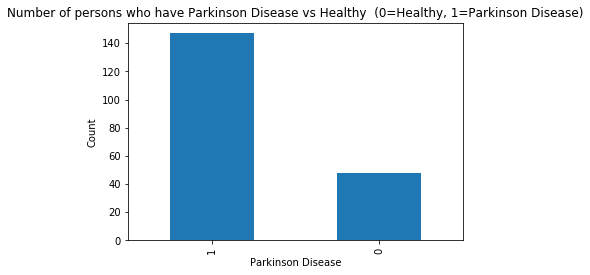

In [6]:
plt.figure()
parkinson_df_count.plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Parkinson Disease")
plt.title('Number of persons who have Parkinson Disease vs Healthy  (0=Healthy, 1=Parkinson Disease)');

### We can see that Parkinson Disease patient are 3 times more than Healthy people
### There is class imbalance

In [7]:
parkinson_df = parkinson_df.rename(columns = {"MDVP:Fo(Hz)": "Average_Vocal_Fundamental_Frequency",
                                  "MDVP:Fhi(Hz)":"Maximum_Vocal_Fundamental_Frequency", 
                                  "MDVP:Flo(Hz)": "Minimum_Vocal_Fundamental_Frequency",
                                  "MDVP:Jitter(%)": "Jitter_Percentage",
                                  "MDVP:Jitter(Abs)": "Jitter_Absolute"})

In [8]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                                   195 non-null object
Average_Vocal_Fundamental_Frequency    195 non-null float64
Maximum_Vocal_Fundamental_Frequency    195 non-null float64
Minimum_Vocal_Fundamental_Frequency    195 non-null float64
Jitter_Percentage                      195 non-null float64
Jitter_Absolute                        195 non-null float64
MDVP:RAP                               195 non-null float64
MDVP:PPQ                               195 non-null float64
Jitter:DDP                             195 non-null float64
MDVP:Shimmer                           195 non-null float64
MDVP:Shimmer(dB)                       195 non-null float64
Shimmer:APQ3                           195 non-null float64
Shimmer:APQ5                           195 non-null float64
MDVP:APQ                               195 non-null float64
Shimmer:DDA                            195 non-null floa

> -  There are no null values
-  Except for name all other columns are numeric


In [9]:
parkinson_df_names = parkinson_df['name'].str[9:12]
parkinson_df_names.unique()

array(['S01', 'S02', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S13',
       'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S24', 'S25',
       'S26', 'S27', 'S31', 'S32', 'S33', 'S34', 'S35', 'S37', 'S39',
       'S42', 'S43', 'S44', 'S49', 'S50'], dtype=object)

### From above it can be found that there is some missing values in data S03,S09,S11...

In [10]:
parkinson_df_descriptive_stat = parkinson_df.describe().transpose()
parkinson_df_descriptive_stat

,count,mean,std,min,25%,50%,75%,max
Average_Vocal_Fundamental_Frequency,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Maximum_Vocal_Fundamental_Frequency,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Minimum_Vocal_Fundamental_Frequency,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitter_Percentage,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitter_Absolute,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


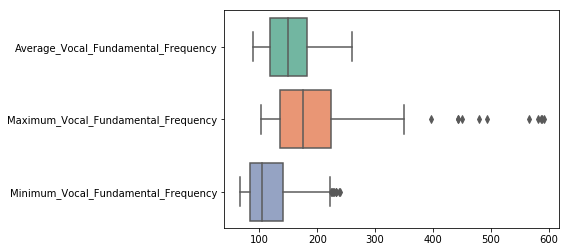

In [11]:
sns.boxplot(data=parkinson_df[['Average_Vocal_Fundamental_Frequency','Maximum_Vocal_Fundamental_Frequency','Minimum_Vocal_Fundamental_Frequency']], orient="h", palette="Set2")

In [12]:
## Maximum_Vocal_Fundamental_Frequency has lot of outliers

In [13]:
parkinson_df_descriptive_stat

,count,mean,std,min,25%,50%,75%,max
Average_Vocal_Fundamental_Frequency,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
Maximum_Vocal_Fundamental_Frequency,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
Minimum_Vocal_Fundamental_Frequency,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
Jitter_Percentage,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
Jitter_Absolute,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


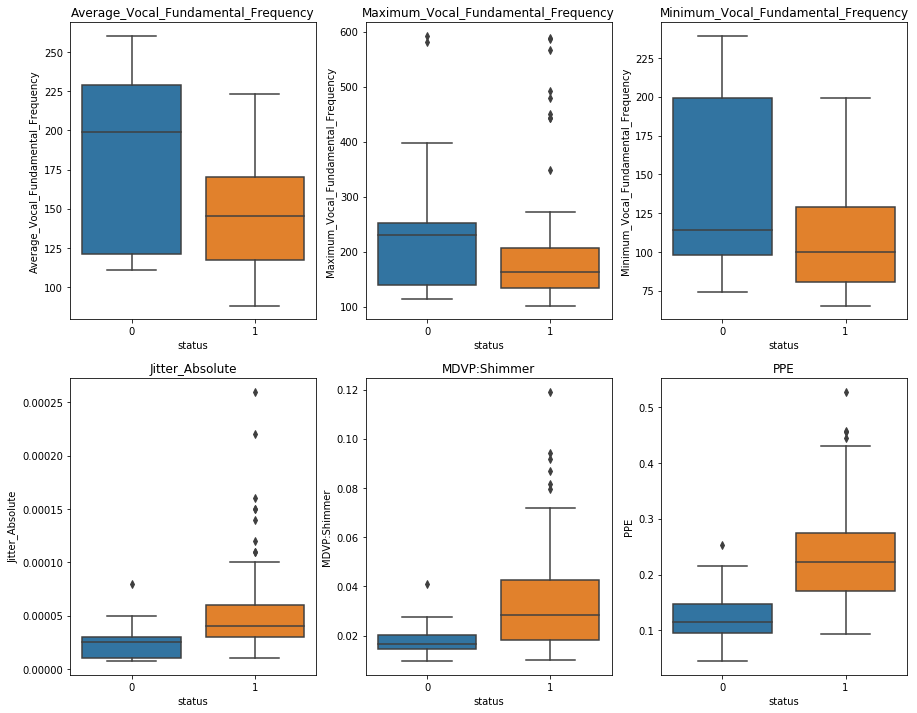

In [14]:
# adjust figure size
plt.figure(figsize=(15, 12))


plt.subplot(2, 3, 1)
sns.boxplot(x='status', y='Average_Vocal_Fundamental_Frequency', data=parkinson_df)
plt.title("Average_Vocal_Fundamental_Frequency")

plt.subplot(2, 3, 2)
sns.boxplot(x='status', y='Maximum_Vocal_Fundamental_Frequency', data=parkinson_df)
plt.title("Maximum_Vocal_Fundamental_Frequency")

plt.subplot(2, 3, 3)
sns.boxplot(x='status', y='Minimum_Vocal_Fundamental_Frequency', data=parkinson_df)
plt.title("Minimum_Vocal_Fundamental_Frequency")



plt.subplot(2, 3, 4)
sns.boxplot(x='status', y='Jitter_Absolute', data=parkinson_df)
plt.title("Jitter_Absolute")

plt.subplot(2, 3, 5)
sns.boxplot(x='status', y='MDVP:Shimmer', data=parkinson_df)
plt.title("MDVP:Shimmer")

plt.subplot(2, 3, 6)
sns.boxplot(x='status', y='PPE', data=parkinson_df)
plt.title("PPE")

plt.show()

>  ## Jitter and shimmer are the two common perturbation measures in acoustic analysis. Jitter is a measure of frequency instability, while shimmer is a measure of amplitude instability

### Parkinson’s Disease patient have high Jitter_Percentage that indicates more instability
### Parkinson’s Disease patient have lower frequencies as compared to healthy patients
### Similarly shimmer is higher Parkinson’s Disease patient

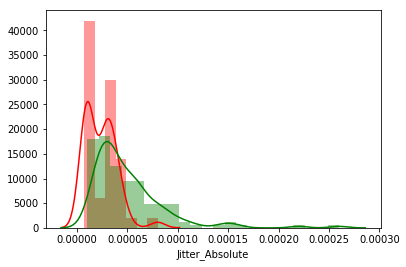

In [15]:
sns.distplot( parkinson_df[parkinson_df.status == 0]['Jitter_Absolute'], color = 'r')
sns.distplot( parkinson_df[parkinson_df.status == 1]['Jitter_Absolute'], color = 'g')

### parkinson patient have high jitter values i.e because of long tail

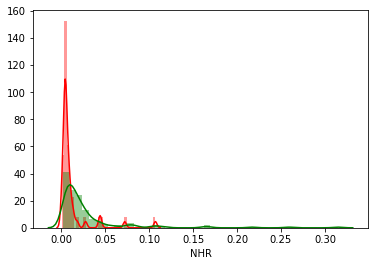

In [16]:
sns.distplot( parkinson_df[parkinson_df.status == 0]['NHR'], color = 'r')
sns.distplot( parkinson_df[parkinson_df.status == 1]['NHR'], color = 'g')

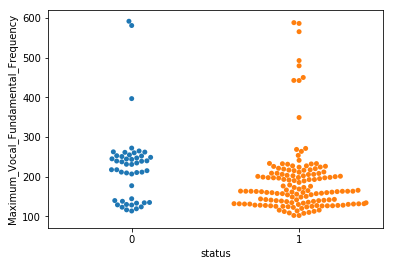

In [17]:
sns.swarmplot(y='Maximum_Vocal_Fundamental_Frequency', x='status', data=parkinson_df)

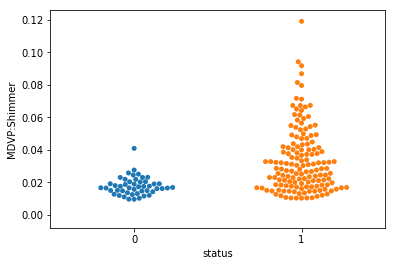

In [18]:
sns.swarmplot(y='MDVP:Shimmer', x='status', data=parkinson_df)

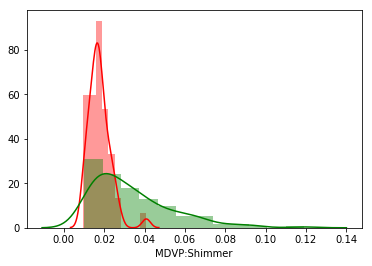

In [19]:
sns.distplot( parkinson_df[parkinson_df.status == 0]['MDVP:Shimmer'], color = 'r')
sns.distplot( parkinson_df[parkinson_df.status == 1]['MDVP:Shimmer'], color = 'g')

In [20]:
# Parkinson’s Disease have high shimmer

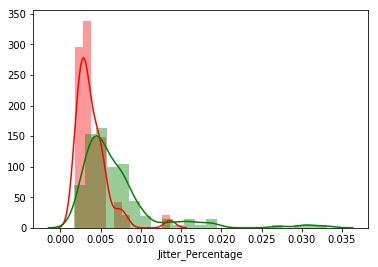

In [21]:
sns.distplot( parkinson_df[parkinson_df.status == 0]['Jitter_Percentage'], color = 'r')
sns.distplot( parkinson_df[parkinson_df.status == 1]['Jitter_Percentage'], color = 'g')

### Jitter Percentages for Parkinson’s Disease patient are higher

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


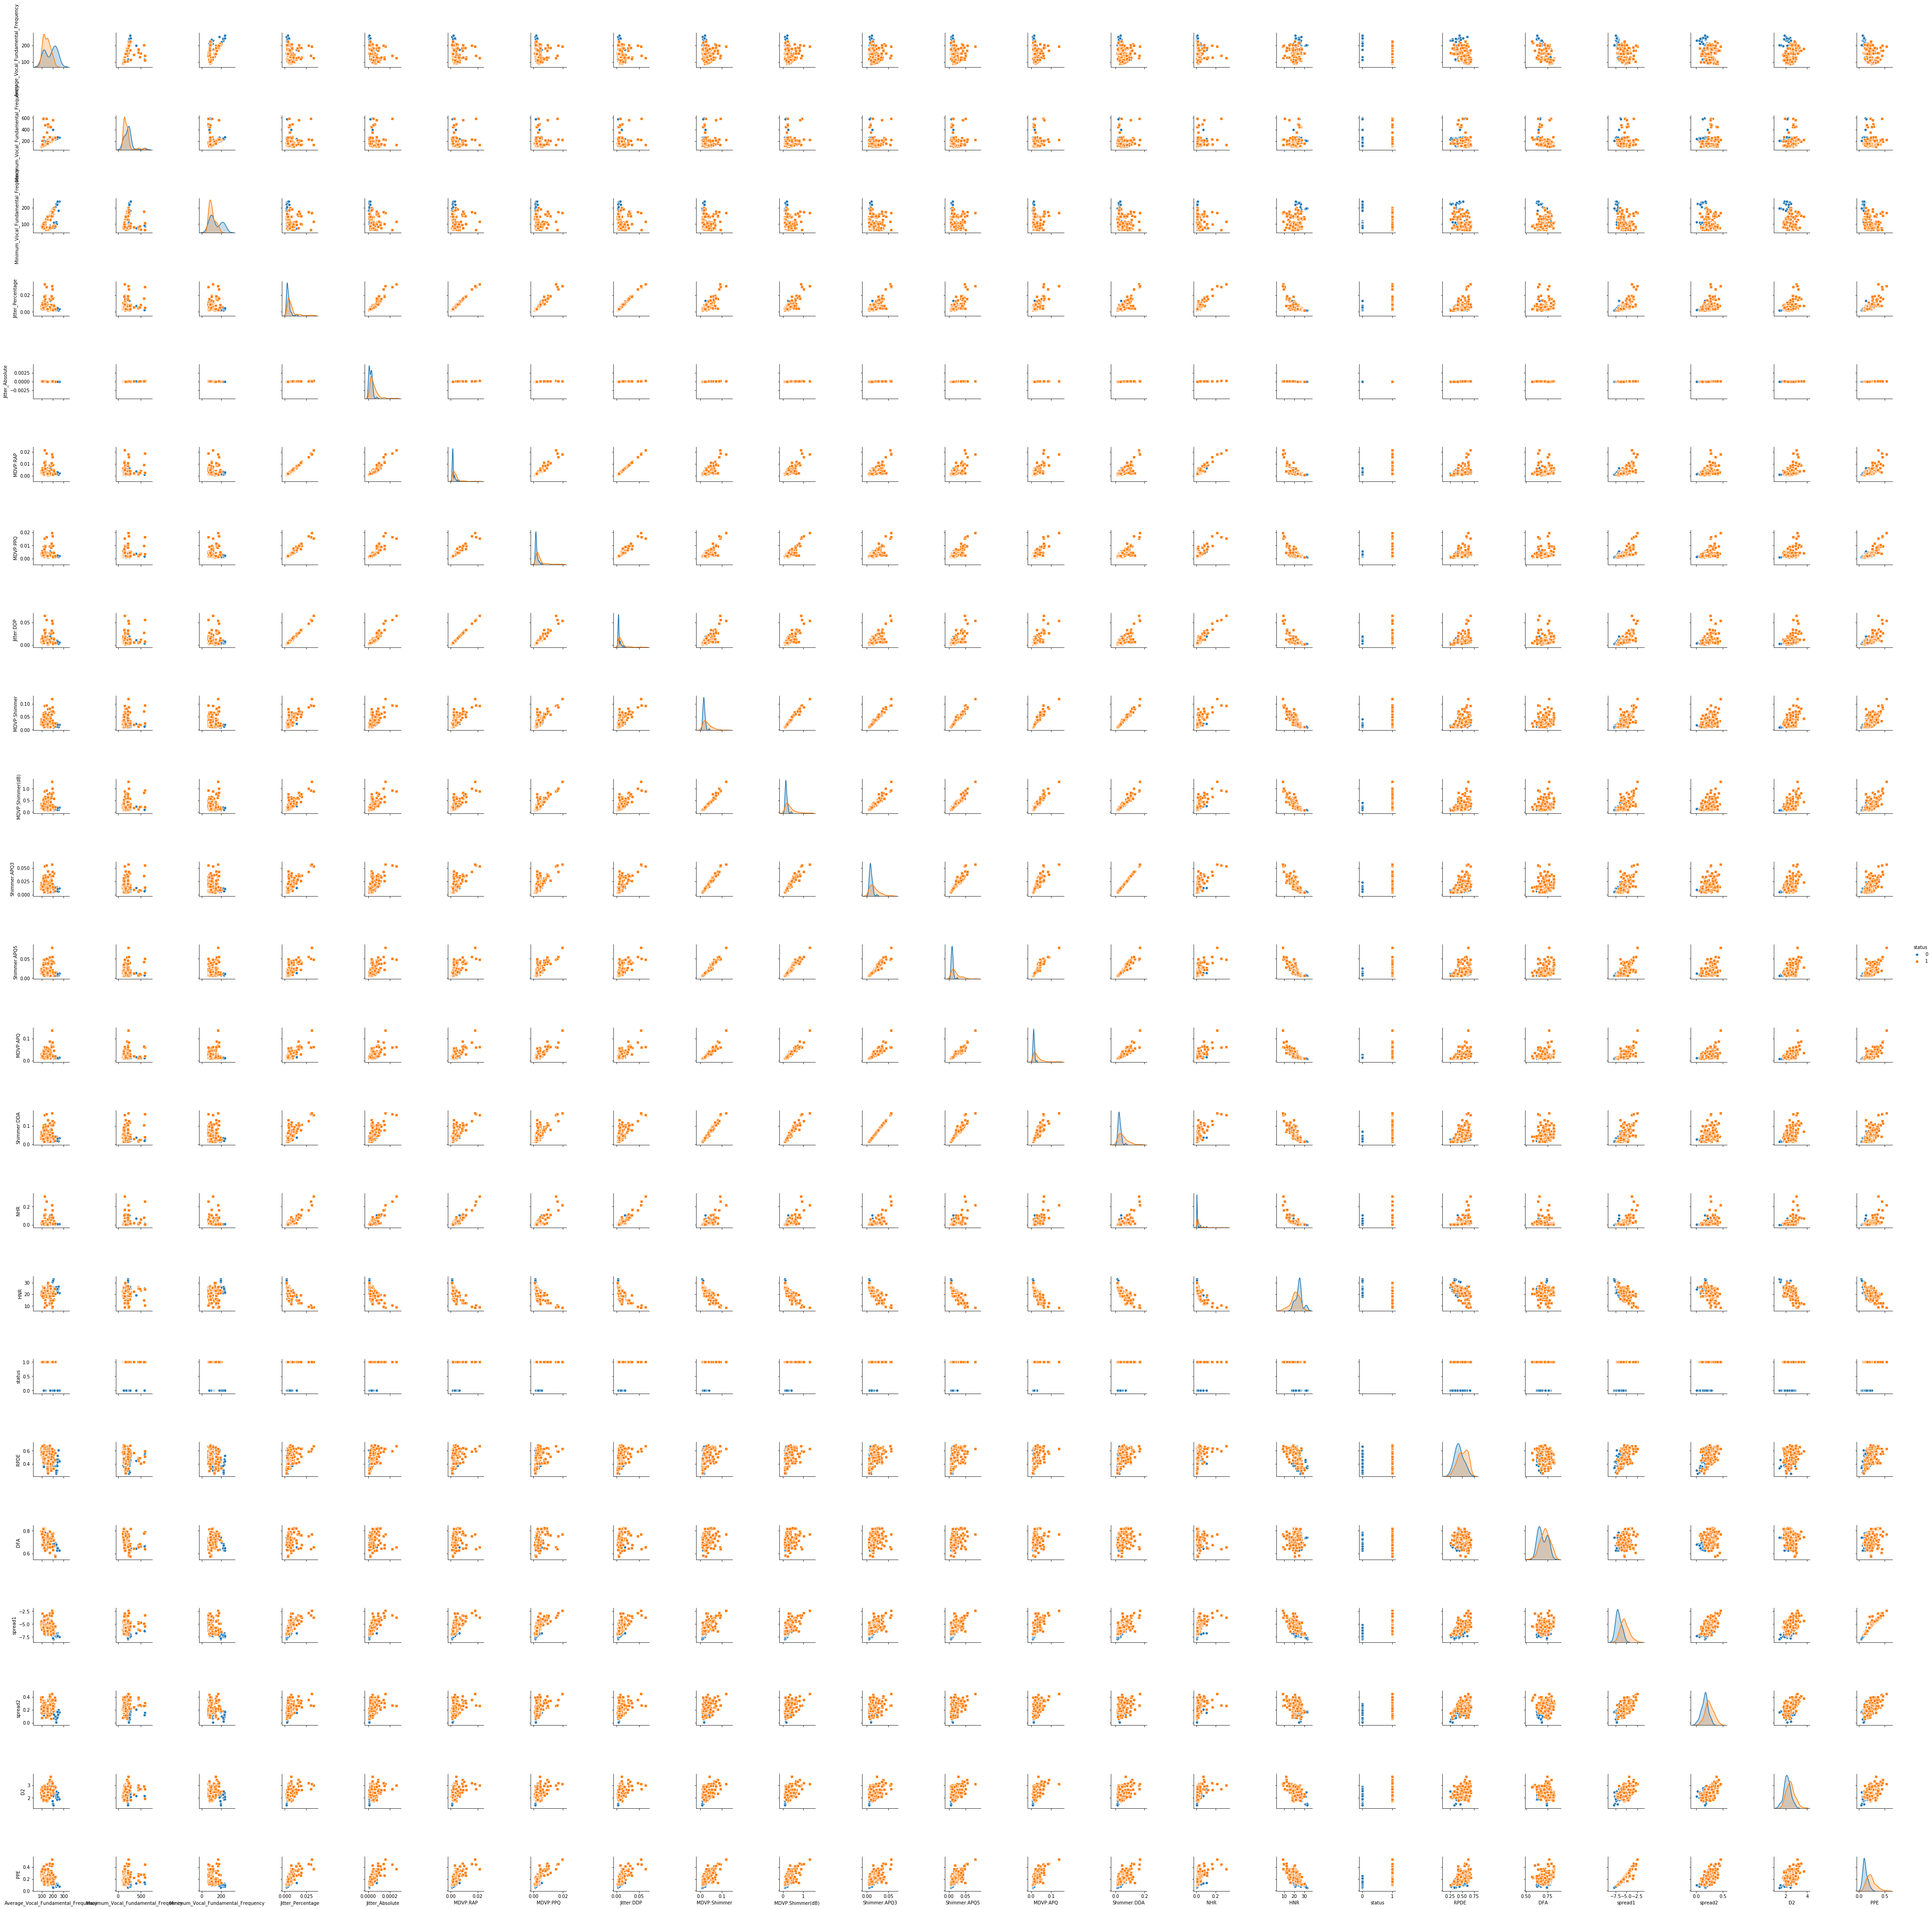

In [22]:
sns.pairplot(parkinson_df, diag_kind='kde', hue='status', markers=["o", "s"])

> ### Average_Vocal_Fundamental_Frequency is higher for Parkinson’s Disease Patient

> ### Blue 0 - Healthy 
> ### Orange 1 - Parkinson’s Disease Patient

### Few columns with right-tail i.e outliers , However should not eliminate outliers as they are significant in diagnosing outliers

In [23]:
parkinson_df_corr = parkinson_df.corr()
parkinson_df_corr

,Average_Vocal_Fundamental_Frequency,Maximum_Vocal_Fundamental_Frequency,Minimum_Vocal_Fundamental_Frequency,Jitter_Percentage,Jitter_Absolute,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Average_Vocal_Fundamental_Frequency,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Maximum_Vocal_Fundamental_Frequency,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Minimum_Vocal_Fundamental_Frequency,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
Jitter_Percentage,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
Jitter_Absolute,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


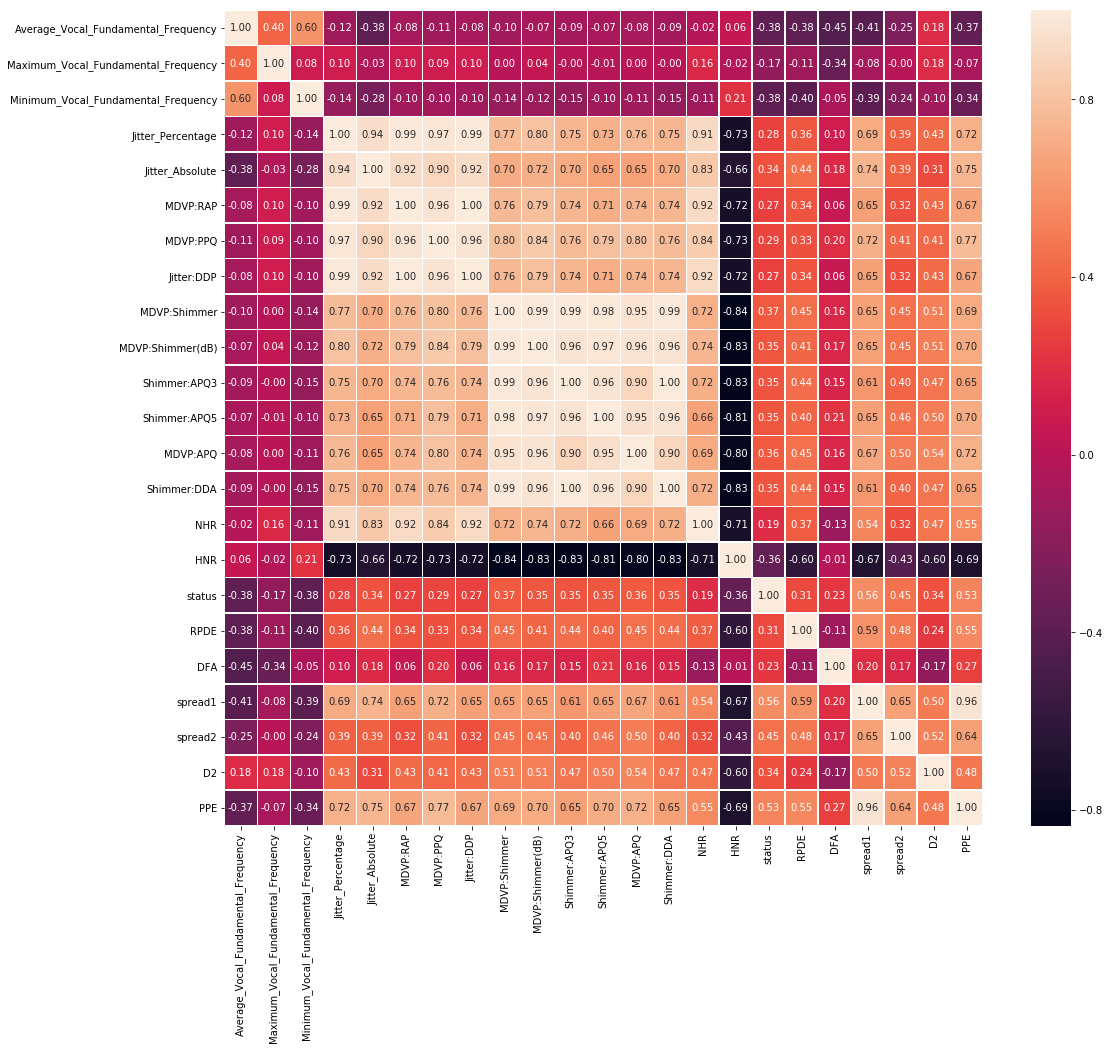

In [24]:
# adjust figure size
plt.figure(figsize=(17, 15))
sns.heatmap(parkinson_df_corr,annot=True,fmt='0.2f',linewidths=.5)

In [25]:
parkinson_df_corr.columns

Index(['Average_Vocal_Fundamental_Frequency',
       'Maximum_Vocal_Fundamental_Frequency',
       'Minimum_Vocal_Fundamental_Frequency', 'Jitter_Percentage',
       'Jitter_Absolute', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

## Analysis is as below
1) Jitter Percentage , Jitter absolute ,MDVP:RAP ,MDVP:PPQ are highly correlated <br>
2) Jitter:DDP is highly correlated with MDVP:RAP <br>
3) MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA are highly correlated (more than 90 % correlation). As stated in the parkinsons.data file these are measures of variation in amplitude <br>
4) MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA values are higher for Parkinson’s Disease patient
5) Shimmer:APQ3 and Shimmer:DDA have a correlation of 1 so  one of them can be removed.

<br>
Without much business understanding we cannot drop much columns so droping only Jitter_Percentage and Shimmer:APQ3

In [26]:
parkinson_df = parkinson_df.drop(['name','Jitter_Percentage','Shimmer:APQ3'],axis=1)

In [27]:
parkinson_df.head(2)

,Average_Vocal_Fundamental_Frequency,Maximum_Vocal_Fundamental_Frequency,Minimum_Vocal_Fundamental_Frequency,Jitter_Absolute,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.03130,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.04518,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


### Q4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [28]:
parkinson_df_X = parkinson_df.drop('status',axis=1)
parkinson_df_y = parkinson_df['status']
parkinson_df_X.sample(2)

,Average_Vocal_Fundamental_Frequency,Maximum_Vocal_Fundamental_Frequency,Minimum_Vocal_Fundamental_Frequency,Jitter_Absolute,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
131,120.256,125.306,104.773,0.00003,0.00224,0.00205,0.00671,0.01516,0.138,0.00815,0.01310,0.02164,0.01015,26.017,0.468621,0.735136,-6.112667,0.217013,2.527742,0.170633
130,120.289,128.143,100.209,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,0.00820,0.01194,0.02110,0.01610,23.949,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923


In [169]:
parkinson_df_X_train, parkinson_df_X_test, parkinson_df_y_train, parkinson_df_y_test = train_test_split(parkinson_df_X,parkinson_df_y,test_size=0.3,random_state=8)

In [170]:
(parkinson_df_X_train.shape, parkinson_df_X_test.shape, parkinson_df_y_train.shape, parkinson_df_y_test.shape)

((136, 20), (59, 20), (136,), (59,))

## Q5: Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [31]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(parkinson_df_X_train, parkinson_df_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [32]:
print("Accuracy score is %f"%dt_model.score(parkinson_df_X_test,parkinson_df_y_test))

Accuracy score is 0.864407


In [33]:
df_confuion_matrix = pd.crosstab(parkinson_df_y_test,dt_model.predict(parkinson_df_X_test), rownames=['Actual'], colnames=['Predicted'],margins=True)
df_confuion_matrix

Predicted,0,1,All
Actual,,,
0,5,7,12
1,1,46,47
All,6,53,59


In [34]:
def DTreeModel(dt_model):
    parkinson_df_y_predict = dt_model.predict(parkinson_df_X_test)
    print(metrics.classification_report(parkinson_df_y_test, parkinson_df_y_predict))
    train_char_label = ['0', '1']

    Parkinson_Disease_Tree_File = open('Parkinson_Disease.dot','w')
    dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_Disease_Tree_File, feature_names = list(parkinson_df_X_train), class_names = list(train_char_label))

    Parkinson_Disease_Tree_File.close()

    # importance of features in the tree building ( The importance of a feature is computed as the 
    #(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
    print("Feature Importance table")
    print(pd.DataFrame(dt_model.feature_importances_, columns = ["Feature_Importance"], index = parkinson_df_X_train.columns).sort_values(by=['Feature_Importance'], ascending=False))


In [35]:
DTreeModel(dt_model)

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.87      0.98      0.92        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.85      0.70      0.74        59
weighted avg       0.86      0.86      0.85        59

Feature Importance table
                                     Feature_Importance
PPE                                            0.357512
MDVP:RAP                                       0.171544
DFA                                            0.129409
Average_Vocal_Fundamental_Frequency            0.125044
Maximum_Vocal_Fundamental_Frequency            0.098825
NHR                                            0.039944
Jitter:DDP                                     0.039371
RPDE                                           0.038349
Jitter_Absolute                                0.000000
MDVP:PPQ                                       0.000000
MDVP:Shimmer                    

In [36]:
system("dot -Tpng Parkinson_Disease.dot -o Parkinson_Disease_tree.png")
#Image("Parkinson_Disease_tree.png")
#from subprocess import check_call
#check_call(['dot','-Tpng','Parkinson_Disease.dot','-o','Parkinson_Disease_tree.png'])

1

## Q7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

> ### Decision Tree can overfit the data. To prevent over fitting regularization parameters are used. Regularization parameters prun the tree.

In [171]:
dt_model_regularized = DecisionTreeClassifier(criterion = 'entropy',max_depth=5 )
dt_model_regularized.fit(parkinson_df_X_train, parkinson_df_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
print("Accuracy score is %f"%dt_model_regularized.score(parkinson_df_X_test,parkinson_df_y_test))

Accuracy score is 0.881356


In [173]:
parkinson_df_y_predict_regularized = dt_model_regularized.predict(parkinson_df_X_test)
df_confuion_matrix_regularized = pd.crosstab(parkinson_df_y_test,parkinson_df_y_predict_regularized, rownames=['Actual'], colnames=['Predicted'],margins=True)
df_confuion_matrix_regularized

Predicted,0,1,All
Actual,,,
0,6,6,12
1,1,46,47
All,7,52,59


In [174]:
DTreeModel(dt_model_regularized)

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.88      0.98      0.93        47

   micro avg       0.88      0.88      0.88        59
   macro avg       0.87      0.74      0.78        59
weighted avg       0.88      0.88      0.87        59

Feature Importance table
                                     Feature_Importance
PPE                                            0.357512
Jitter:DDP                                     0.210915
Average_Vocal_Fundamental_Frequency            0.163394
Maximum_Vocal_Fundamental_Frequency            0.098825
DFA                                            0.056725
Jitter_Absolute                                0.048388
NHR                                            0.039944
Shimmer:APQ5                                   0.024295
HNR                                            0.000000
D2                                             0.000000
spread2                         

In [175]:
train_char_label = ['0', '1']
dot_data_reg = tree.export_graphviz(dt_model_regularized, out_file= "Parkinson_Disease_reg.dot" , feature_names = list(parkinson_df_X_train), class_names = list(train_char_label))
system("dot -Tpng Parkinson_Disease_reg.dot -o Parkinson_Disease_reg.png")
#Image("Parkinson_Disease_reg.png")

1

## Changing the max_depth to 5 has changed model Recall , Accuracy and Feature Importance
## Model is correctly able to identify all Parkinson’s Disease Patient with greater recall

In [66]:
dt_model_regularized_min_leaf=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=4)
dt_model_regularized_min_leaf.fit(parkinson_df_X_train, parkinson_df_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
def decisionTreeModel(model):
    print("Accuracy score is %f"%model.score(parkinson_df_X_test,parkinson_df_y_test))
    print("\n")
    y_predict = dt_model_regularized.predict(parkinson_df_X_test)
    df_confuion_matrix_tab = pd.crosstab(parkinson_df_y_test,y_predict, rownames=['Actual'], colnames=['Predicted'],margins=True)
    print("Confusion Mattix\n")
    print(df_confuion_matrix_tab)
    print("\n")
    print(metrics.classification_report(parkinson_df_y_test, y_predict))
    train_char_label = ['0', '1']

    print("\n")
    # importance of features in the tree building ( The importance of a feature is computed as the 
    #(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
    print("Feature Importance table")
    print(pd.DataFrame(model.feature_importances_, columns = ["Feature_Importance"], index = parkinson_df_X_train.columns).sort_values(by=['Feature_Importance'], ascending=False))


In [84]:
decisionTreeModel(dt_model_regularized_min_leaf)

Accuracy score is 0.898305


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
PPE                                            0.406787
Jitter:DDP                                     0.227491
Average_Vocal_Fundamental_Frequency            0.142279
Maximum_Vocal_Fundamental_Frequency            0.112446
DFA                                            0.064544
MDVP:Shimmer                                   0.022495
spread1                                        0.012886
Shimmer:APQ5                      

In [118]:
tree.export_graphviz(dt_model_regularized_min_leaf, out_file='Parkinson_Disease.dot', feature_names = list(parkinson_df_X_train), class_names = list(train_char_label))
system("dot -Tpng Parkinson_Disease.dot -o Parkinson_Disease.png")
#Image("Parkinson_Disease.png")

1

### There is a change in accuracy and Feature Importance

In [89]:
dt_model_reg=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3,max_depth=5)
dt_model_reg.fit(parkinson_df_X_train, parkinson_df_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
decisionTreeModel(dt_model_reg)

Accuracy score is 0.864407


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
PPE                                            0.395995
Jitter:DDP                                     0.233619
Average_Vocal_Fundamental_Frequency            0.138504
Maximum_Vocal_Fundamental_Frequency            0.125030
DFA                                            0.089518
RPDE                                           0.017333
Jitter_Absolute                                0.000000
NHR                               

### Q8 Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [151]:
rf_500 = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=8)
rf_500.fit(parkinson_df_X_train, parkinson_df_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [152]:
decisionTreeModel(rf_500)

Accuracy score is 0.932203


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
spread1                                        0.131131
PPE                                            0.123131
Average_Vocal_Fundamental_Frequency            0.092576
Jitter:DDP                                     0.058541
Minimum_Vocal_Fundamental_Frequency            0.057904
Maximum_Vocal_Fundamental_Frequency            0.052274
MDVP:RAP                                       0.045736
spread2                           

In [153]:
randomForestModels = {}
for ntree in range(50,201,50):
    rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=8)
    randomForestModels[ntree]=rf
    randomForestModels[ntree].fit(parkinson_df_X_train, parkinson_df_y_train)

In [154]:
print("Random Forest for 50 trees")
decisionTreeModel(randomForestModels[50])

Random Forest for 50 trees
Accuracy score is 0.932203


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
spread1                                        0.131131
PPE                                            0.123131
Average_Vocal_Fundamental_Frequency            0.092576
Jitter:DDP                                     0.058541
Minimum_Vocal_Fundamental_Frequency            0.057904
Maximum_Vocal_Fundamental_Frequency            0.052274
MDVP:RAP                                       0.045736
spread2

In [115]:
print("Random Forest for 100 trees")
decisionTreeModel(randomForestModels[100])

Random Forest for 100 trees
Accuracy score is 0.932203


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
spread1                                        0.144308
PPE                                            0.116553
Average_Vocal_Fundamental_Frequency            0.097464
Maximum_Vocal_Fundamental_Frequency            0.057987
Minimum_Vocal_Fundamental_Frequency            0.056787
spread2                                        0.053681
MDVP:RAP                                       0.053632
Jitter

In [155]:
print("Random Forest for 150 trees")
decisionTreeModel(randomForestModels[150])

Random Forest for 150 trees
Accuracy score is 0.932203


Confusion Mattix

Predicted   0   1  All
Actual                
0           8   4   12
1           2  45   47
All        10  49   59


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

   micro avg       0.90      0.90      0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



Feature Importance table
                                     Feature_Importance
spread1                                        0.131131
PPE                                            0.123131
Average_Vocal_Fundamental_Frequency            0.092576
Jitter:DDP                                     0.058541
Minimum_Vocal_Fundamental_Frequency            0.057904
Maximum_Vocal_Fundamental_Frequency            0.052274
MDVP:RAP                                       0.045736
spread

### Accuracy has increased as compared to decision tree. Feature mportance has also changed as compared to decision tree.
### spread1  is having highest feature importance in all random forests

In [158]:
dot_data = tree.export_graphviz(rf_500.estimators_[0], out_file= "tree.dot" , feature_names = list(parkinson_df_X_train), class_names = list(train_char_label))
system("dot -Tpng tree.dot -o credit_tree.png")
#Image("credit_tree.png")

1